In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

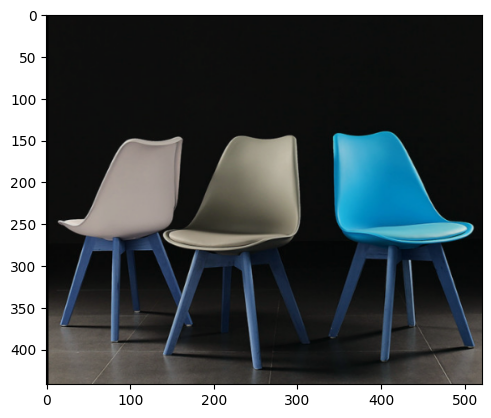

In [4]:
# openCV reads in BGR
img_origin = cv2.imread('ex.png')
plt.imshow(img_origin)

In [5]:
import sys
from  PIL  import Image

img_origin = cv2.imread('ex.png', cv2.IMREAD_UNCHANGED)
original = img_origin.copy()

l = int(max(5, 6))
u = int(min(6, 6))

ed = cv2.cvtColor(img_origin, cv2.COLOR_BGR2GRAY)
edges = cv2.GaussianBlur(img_origin, (21, 51), 3)
edges = cv2.cvtColor(edges, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(edges, l, u)

_, thresh = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY  + cv2.THRESH_OTSU)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=4)

data = mask.tolist()
sys.setrecursionlimit(10**8)
for i in  range(len(data)):
    for j in  range(len(data[i])):
        if data[i][j] !=  255:
            data[i][j] =  -1
        else:
            break
    for j in  range(len(data[i])-1, -1, -1):
        if data[i][j] !=  255:
            data[i][j] =  -1
        else:
            break
image = np.array(data)
image[image !=  -1] =  255
image[image ==  -1] =  0

mask = np.array(image, np.uint8)

result = cv2.bitwise_and(original, original, mask=mask)
result[mask ==  0] =  255
cv2.imwrite('bg.png', result)

img = Image.open('bg.png')
img.convert("RGBA")
datas = img.getdata()

newData = []
for item in datas:
    if item[0] ==  255  and item[1] ==  255  and item[2] ==  255:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)

img.putdata(newData)
img.save("img.png", "PNG")

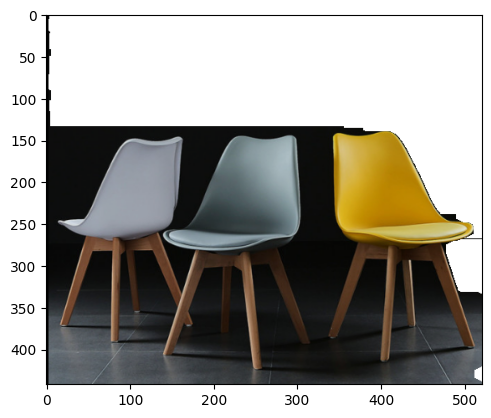

In [6]:
# converting from BGR to RGB
img = cv2.imread("img.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(img)

In [7]:
# reshape the image
img=img.reshape((img.shape[1]*img.shape[0],3))

In [8]:
# KMeans
kmeans=KMeans(n_clusters=5)
s=kmeans.fit(img)

In [9]:
# labels
labels=kmeans.labels_
print(labels)
labels=list(labels)

[0 0 0 ... 3 3 3]


In [10]:
# determine centroids of clusters
centroid=kmeans.cluster_centers_
print(centroid)

[[ 20.12719247  19.07766469  17.30323155]
 [254.90269341 254.91233128 254.89937768]
 [147.33603051 153.93191964 155.0187407 ]
 [ 81.8976059   76.98070275  72.93754192]
 [192.47781756 148.92582503  28.07868929]]


In [11]:
percent=[]
for i in range(len(centroid)):
  j=labels.count(i)
  j=j/(len(labels))
  percent.append(j)
print(percent)

[0.33176713768336213, 0.35098705065962604, 0.0933029937207424, 0.16827628733465924, 0.0556665306016102]


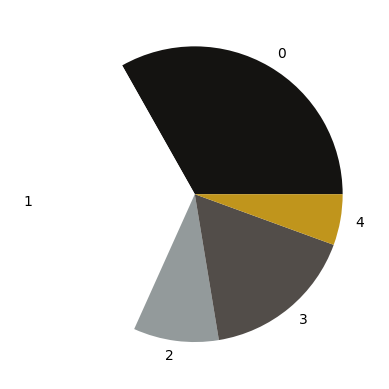

In [12]:
# plot a pie chart
plt.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid)))
plt.show()

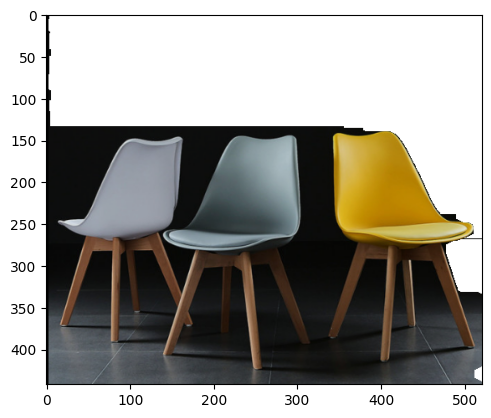

In [13]:
# https://intrepidgeeks.com/tutorial/extract-color-from-image

import cv2
import matplotlib.colors as cs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

#set path to image
imgpath = 'img.png'
#set number of cluster for kmeans
clusterno = 5

#read image
img = cv2.imread(imgpath)
#convert bgr to rgb
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img)
cv2.imshow("image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#reshape img array
n_img = np.reshape(img,(img.shape[0]*img.shape[1],3))

In [14]:
#use kmeans to find cluster of color
clt = KMeans(n_clusters=clusterno)
clt.fit(n_img)

#get unique value of labels in kmeans
labels = np.unique(clt.labels_)

#find the pixel numbers of each color that is set by cluster number
hist,_ = np.histogram(clt.labels_,bins=np.arange(len(labels)+1))

#declare list to hold color to be used in chart
colors = []

#declare list to hold hex color code for labeling in chart
hexlabels = []

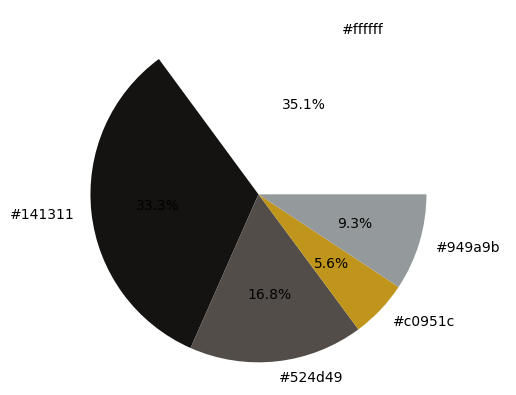

In [15]:
#get the main color
for i in range(clt.cluster_centers_.shape[0]):
  colors.append(tuple(clt.cluster_centers_[i]/255))
  hexlabels.append(cs.to_hex(tuple(clt.cluster_centers_[i]/255)))

#create pie chart for color
plt.pie(hist,labels=hexlabels,colors=colors,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [16]:
hexlabels

['#ffffff', '#141311', '#524d49', '#c0951c', '#949a9b']

In [17]:
def hex2rgb(hex_value):
    h = hex_value.strip("#") 
    rgb = tuple(int(h[i:i+2], 16) for i in (0, 2, 4))
    return rgb

In [18]:
hex2rgb(hexlabels[0])

(255, 255, 255)

In [19]:
rgblabels = []
for i in range(len(hexlabels)):
    rgblabels.append(hex2rgb(hexlabels[i]))

rgblabels

[(255, 255, 255), (20, 19, 17), (82, 77, 73), (192, 149, 28), (148, 154, 155)]

In [20]:
import colorsys
def rgb2hsv(r,g,b):
    return colorsys.rgb_to_hsv(r,g,b)

In [21]:
hsvlabels = []
for i in range(len(rgblabels)):
    hsvlabels.append(rgb2hsv(rgblabels[i][0], rgblabels[i][1], rgblabels[i][2]))

hsvlabels

# hsv (hue 색상, saturation 채도, value 명도)(v 대신 i,b,l 도 됨)
# H : 0 ~ 360
# S : 0 ~ 100 (진함)
# V : 0 ~ 100 (밝음)


[(0.0, 0.0, 255),
 (0.11111111111111112, 0.15, 20),
 (0.07407407407407407, 0.10975609756097561, 82),
 (0.12296747967479675, 0.8541666666666666, 192),
 (0.5238095238095238, 0.04516129032258064, 155)]

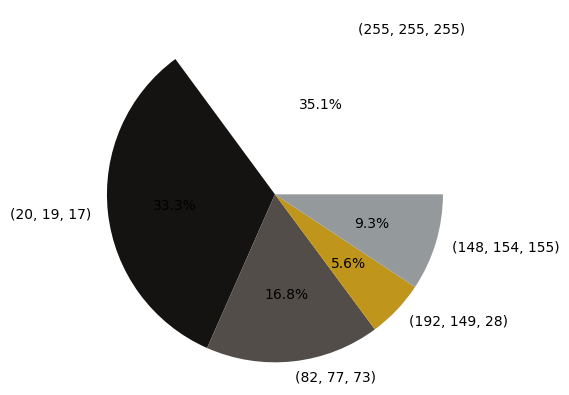

In [22]:
#create pie chart for color
plt.pie(hist,labels=rgblabels,colors=colors,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

[(0.07891823579489357, 0.07480591869956225, 0.06784958458388447), (0.9996184055171444, 0.9996562010804169, 0.9996054026791242), (0.5776892916616532, 0.6035602756248338, 0.6077726277279161), (0.7548436350089175, 0.5840257610597565, 0.10999477816359336), (0.3211333023687698, 0.30180596158574274, 0.285933697419737)]
['#141311', '#ffffff', '#939a9b', '#c0951c', '#524d49']


[(0.11111111111111112, 0.15, 20),
 (0.0, 0.0, 255),
 (0.5208333333333334, 0.05161290322580645, 155),
 (0.12296747967479675, 0.8541666666666666, 192),
 (0.07407407407407407, 0.10975609756097561, 82)]

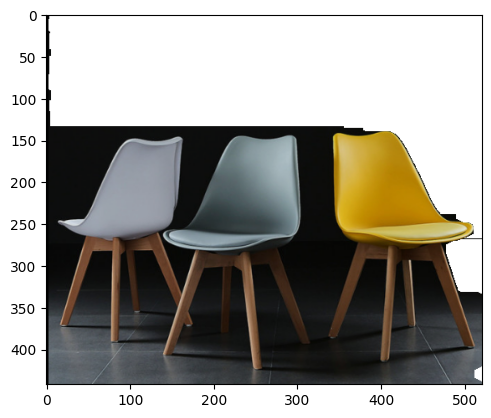

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
import colorsys

def hex2rgb(hex_value):
    h = hex_value.strip("#") 
    rgb = tuple(int(h[i:i+2], 16) for i in (0, 2, 4))
    return rgb


def rgb2hsv(r,g,b):
    return colorsys.rgb_to_hsv(r,g,b)

def kmeans_color_to_hsv(img):

    # reshape the image
    img=img.reshape((img.shape[1]*img.shape[0],3))

    #use kmeans to find cluster of color
    clt = KMeans(n_clusters=clusterno)
    clt.fit(n_img)

    #get unique value of labels in kmeans
    labels = np.unique(clt.labels_)

    #find the pixel numbers of each color that is set by cluster number
    hist,_ = np.histogram(clt.labels_,bins=np.arange(len(labels)+1))

    #declare list to hold color to be used in chart
    colors = []

    #declare list to hold hex color code for labeling in chart
    hexlabels = []

    #declare list to hold rgb color code for labeling in chart
    rgblabels = []

    #declare list to hold hsv color code for labeling in chart
    hsvlabels = []

    #get the main color
    for i in range(clt.cluster_centers_.shape[0]):
        colors.append(tuple(clt.cluster_centers_[i]/255))
        hexlabels.append(cs.to_hex(tuple(clt.cluster_centers_[i]/255)))
        
    print(colors)

    print(hexlabels)

    for i in range(len(hexlabels)):
        rgblabels.append(hex2rgb(hexlabels[i]))

    for i in range(len(rgblabels)):
        hsvlabels.append(rgb2hsv(rgblabels[i][0], rgblabels[i][1], rgblabels[i][2]))

    # #create pie chart for color
    # plt.pie(hist,labels=hexlabels,colors=colors,autopct='%1.1f%%')
    # plt.axis('equal')
    # plt.show()

    return hsvlabels


#read image
img = cv2.imread('img.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

final_hsvlabels = kmeans_color_to_hsv(img)

final_hsvlabels


In [24]:
# calculate complementary

ori_r = 100
ori_g = 82
ori_b = 190
print('original rgb : ', ori_r , ', ' , ori_g, ', ', ori_b)

def complementary(r, g, b):
    total = max(r,g,b) + min(r,g,b)
    new_r = total-r
    new_g = total-g
    new_b = total-b

    return (new_r, new_g, new_b)

def rgb2hex(rgb):
    return '%02x%02x%02x' % rgb

print('original hex : ', rgb2hex((ori_r, ori_g, ori_b)))

new_r, new_g, new_b = complementary(ori_r, ori_g, ori_b)
print('new rgb : ', new_r , ', ' , new_g, ', ', new_b)

print('new hex : ', rgb2hex((new_r, new_g, new_b)))


original rgb :  100 ,  82 ,  190
original hex :  6452be
new rgb :  172 ,  190 ,  82
new hex :  acbe52


In [25]:
# complementary in hsv
print('original hsv : ', rgb2hsv(ori_r, ori_g, ori_b))

print('new hsv : ', rgb2hsv(new_r, new_g, new_b))

original hsv :  (0.6944444444444445, 0.5684210526315789, 190)
new hsv :  (0.19444444444444442, 0.5684210526315789, 190)


In [26]:
import colorsys

def hsv2rgb(r,g,b):
    return colorsys.hsv_to_rgb(r,g,b)

print('new_changed_rgb : ', hsv2rgb(0.19444444444444442, 0.5684210526315789, 150))
hsv_s = [0.19444444444444442, 0.5684210526315789, 190]
rgb_s = [135.78947368421052, 150, 64.73684210526316]

new_changed_rgb :  (135.78947368421052, 150, 64.73684210526316)


In [27]:
import pandas as pd

df = pd.read_csv('ColorDataset.csv')
print(df)

         Tone        key  hsva/h  hsva/s  hsva/v  hsva/a
0    WARMSOFT   Colorful      55      84      93       1
1    WARMSOFT   Colorful      17      77      89       1
2    WARMSOFT   Colorful     338      73      75       1
3    WARMSOFT     Casual     349      78      82       1
4    WARMSOFT     Casual       0       1     100       1
..        ...        ...     ...     ...     ...     ...
142  COLDHARD  Masculine     211      55      52       1
143  COLDHARD  Masculine      90       8      19       1
144  COLDHARD   Metallic     202      17      19       1
145  COLDHARD   Metallic     194      19      60       1
146  COLDHARD   Metallic     189      21      24       1

[147 rows x 6 columns]


In [28]:
hsv = [346, 96, 93]

df = pd.read_csv('ColorDataset.csv')
hsva_h = df["hsva/h"]
hsva_s = df["hsva/s"]
hsva_v = df["hsva/v"]

#h값 [0,2pi] 정규화
df = pd.read_csv('ColorDataset.csv')
hsva_h = df["hsva/h"].to_numpy()
hsva_h = hsva_h.reshape(-1,1)

from sklearn.preprocessing import MinMaxScaler
from math import pi

scaler = MinMaxScaler(feature_range=(0,2*pi))
scaler.fit(hsva_h)
hsva_h_scaled = scaler.transform(hsva_h)

hsva_h = pd.DataFrame(hsva_h_scaled, columns=['hsva_h'])

#sv값 [0,1] 정규화
from sklearn.preprocessing import minmax_scale

hsva_s = pd.DataFrame(data=minmax_scale(hsva_s))
hsva_v = pd.DataFrame(data=minmax_scale(hsva_v))

hsva_s.columns = ["hsva_s"]
hsva_v.columns = ["hsva_v"]

scaled_hsv_set = hsva_h.join(hsva_s).join(hsva_v)
scaled_hsv_set

scaled_hsv_set.to_csv("scaled_hsv_dataset.csv", index = False)

In [29]:
#(sin(h1)*s1*v1 - sin(h2)*s2*v2 )^2 + (cos(h1)*s1*v1 - cos(h2)*s2*v2)^2 + ( v1 - v2 )^2

hsv = [0.19444444444444442, 0.5684210526315789, 190]
hsv_h = hsv[0]
hsv_s = hsv[1]
hsv_v = hsv[2]

#추출한 h 값 정규화
hsv_h = (hsv_h/360)*2*pi

#추출한 s값 정규화
hsv_s = hsv_s/100

#추출한 s값 정규화
hsv_v = hsv_v/100

scaled_hsv = [hsv_h, hsv_s, hsv_v]
scaled_hsv

[0.0033936957677667516, 0.005684210526315789, 1.9]

In [30]:
import math

hsv_h = scaled_hsv[0]
hsv_s = scaled_hsv[1]
hsv_v = scaled_hsv[2]

df = scaled_hsv_set
df_origin = pd.read_csv('ColorDataset.csv')
hsva_h = df["hsva_h"].to_numpy()
hsva_s = df["hsva_s"].to_numpy()
hsva_v = df["hsva_v"].to_numpy()
dist = []

for i in range(len(hsva_h)):
    distance = ((math.sin(hsv_h)*hsv_s*hsv_v)-(math.sin(hsva_h[i])*hsva_s[i]*hsva_v[i]))*((math.sin(hsv_h)*hsv_s*hsv_v)-(math.sin(hsva_h[i])*hsva_s[i]*hsva_v[i]))
    + ((math.cos(hsv_h)*hsv_s*hsv_v)-(math.cos(hsva_h[i])*hsva_s[i]*hsva_v[i]))*((math.cos(hsv_h)*hsv_s*hsv_v)-(math.cos(hsva_h[i])*hsva_s[i]*hsva_v[i]))
    + (hsv_v-hsva_v[i])*(hsv_v-hsva_v[i])
    
    dist.append(distance)
    
print(dist)
min(dist)

num = dist.index(min(dist))
print(df.iloc[num])
print(df_origin.iloc[num])

df_origin.loc[df_origin['key'] == df_origin.loc[num, 'key']]

[0.3975150421217762, 0.03818763936679579, 0.033258852298661185, 0.011244849027156882, 1.3433576640208773e-09, 0.04536666724888528, 0.07347400895278479, 7.435721133320147e-05, 0.00046150992319035823, 0.034149054953591274, 0.26542281170007304, 0.016018325364330437, 0.40719804859583036, 0.008877875409464723, 0.00666553479681868, 0.004959432504324719, 0.017089974778304488, 0.02112890829395064, 0.05843270511442977, 1.5694777832735026e-05, 0.0049690355048081876, 0.0025131625180011665, 0.000220743335244067, 0.03456696110416031, 0.045034365808388516, 0.02194876451370087, 0.06465574176411572, 0.001950167016086527, 0.009925470106846024, 0.0014742656766576433, 0.0007142024184281907, 0.0003686491989858577, 0.0015170022921961145, 0.03674128531046381, 0.03526957437584858, 0.0011947881589287, 0.35589585580413396, 0.011932719655523135, 2.576463183639e-06, 1.3433576640208773e-09, 0.002762622604147247, 0.0339690710004895, 0.00011429595330300318, 1.9635143349645828e-05, 0.05704172278060773, 1.34335766405

,Tone,key,hsva/h,hsva/s,hsva/v,hsva/a
3,WARMSOFT,Casual,349,78,82,1
4,WARMSOFT,Casual,0,1,100,1
5,WARMSOFT,Casual,210,88,57,1


In [31]:
#논문에 나온 hsv distance 계산 방식

hsv = [0.19444444444444442, 0.5684210526315789, 190]

df = pd.read_csv('ColorDataset.csv')
hsva_h = df["hsva/h"].to_numpy()
hsva_s = df["hsva/s"].to_numpy()
hsva_v = df["hsva/v"].to_numpy()
dist = []

for i in range(len(hsva_h)):
    if (hsv[0]-hsva_h[i]) < 180:
        h_diff = hsv[0]-hsva_h[i]
    else:
        h_diff = 360 - (hsv[0]-hsva_h)
    for j in range(len(hsva_s)):
        for k in range(len(hsva_v)):
            distance = (hsv[1]*abs(h_diff) + abs(hsv[1]-hsva_s[j]) + abs(hsv[2]-hsva_v[k]))
    dist.append(distance)

print(dist)

min(dist)

num = dist.index(min(dist))
df.iloc[num]

[217.5842105263158, 195.9842105263158, 378.4473684210526, 384.7, 186.5421052631579, 305.6894736842105, 201.66842105263157, 356.84736842105264, 389.2473684210526, 194.84736842105264, 217.5842105263158, 298.3, 215.31052631578947, 220.42631578947368, 384.7, 190.8684210526316, 215.31052631578947, 265.9, 202.23684210526315, 281.8157894736842, 193.1421052631579, 201.1, 213.60526315789474, 222.7, 201.1, 215.87894736842105, 217.5842105263158, 202.23684210526315, 194.84736842105264, 195.9842105263158, 330.13157894736844, 387.54210526315785, 322.7421052631579, 195.4157894736842, 305.6894736842105, 388.67894736842106, 213.03684210526316, 384.13157894736844, 300.5736842105263, 311.37368421052633, 387.54210526315785, 303.9842105263158, 389.81578947368416, 371.62631578947367, 214.17368421052632, 390.38421052631577, 212.46842105263158, 319.9, 384.7, 384.13157894736844, 334.11052631578946, 269.87894736842105, 188.0263157894737, 317.62631578947367, 369.35263157894735, 322.7421052631579, 209.62631578947

Tone      WARMSOFT
key         Casual
hsva/h           0
hsva/s           1
hsva/v         100
hsva/a           1
Name: 4, dtype: object

In [32]:
df.loc[df['key'] == df.loc[num, 'key']]

,Tone,key,hsva/h,hsva/s,hsva/v,hsva/a
3,WARMSOFT,Casual,349,78,82,1
4,WARMSOFT,Casual,0,1,100,1
5,WARMSOFT,Casual,210,88,57,1
